# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory



TASK #2.1: IMPORT SALES TRAINING DATA

In [4]:
# You have to include the full link to the csv file containing your dataset
sales_train_df = pd.read_csv('/content/train.csv')


In [5]:
sales_train_df.head(5)
# almost a million observation
# 1115 unique stores
# Note that sales is the target variable (that's what we are trying to predict)

# Id: transaction ID (combination of Store and date)
# Store: unique store Id
# Sales: sales/day, this is the target variable
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0


In [6]:
sales_train_df.shape

(55813, 9)

In [7]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55813 entries, 0 to 55812
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          55813 non-null  int64  
 1   DayOfWeek      55813 non-null  int64  
 2   Date           55813 non-null  object 
 3   Sales          55813 non-null  int64  
 4   Customers      55813 non-null  int64  
 5   Open           55813 non-null  int64  
 6   Promo          55813 non-null  int64  
 7   StateHoliday   55812 non-null  float64
 8   SchoolHoliday  55812 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 3.8+ MB


In [8]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55812.0,55812.000000
mean,557.406267,4.019977,6115.434648,638.912458,0.863150,0.399548,0.0,0.239178
std,322.178896,1.983740,3754.196751,440.827304,0.343692,0.489810,0.0,0.426585
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,278.000000,2.000000,4178.000000,436.000000,1.000000,0.000000,0.0,0.000000
50%,557.000000,4.000000,6020.000000,609.000000,1.000000,0.000000,0.0,0.000000
75%,836.000000,6.000000,8106.000000,816.000000,1.000000,1.000000,0.0,0.000000
max,1115.000000,7.000000,41551.000000,4783.000000,1.000000,1.000000,0.0,1.000000


In [9]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

TASK #2.2: IMPORT STORE INFORMATION DATA

In [10]:
store_df = pd.read_csv('/content/store.csv')
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
store_df.shape

(1115, 10)

In [12]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

<Axes: >

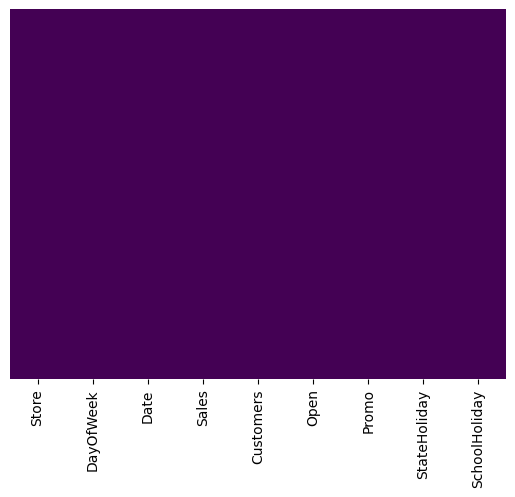

In [14]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     1
SchoolHoliday    1
dtype: int64

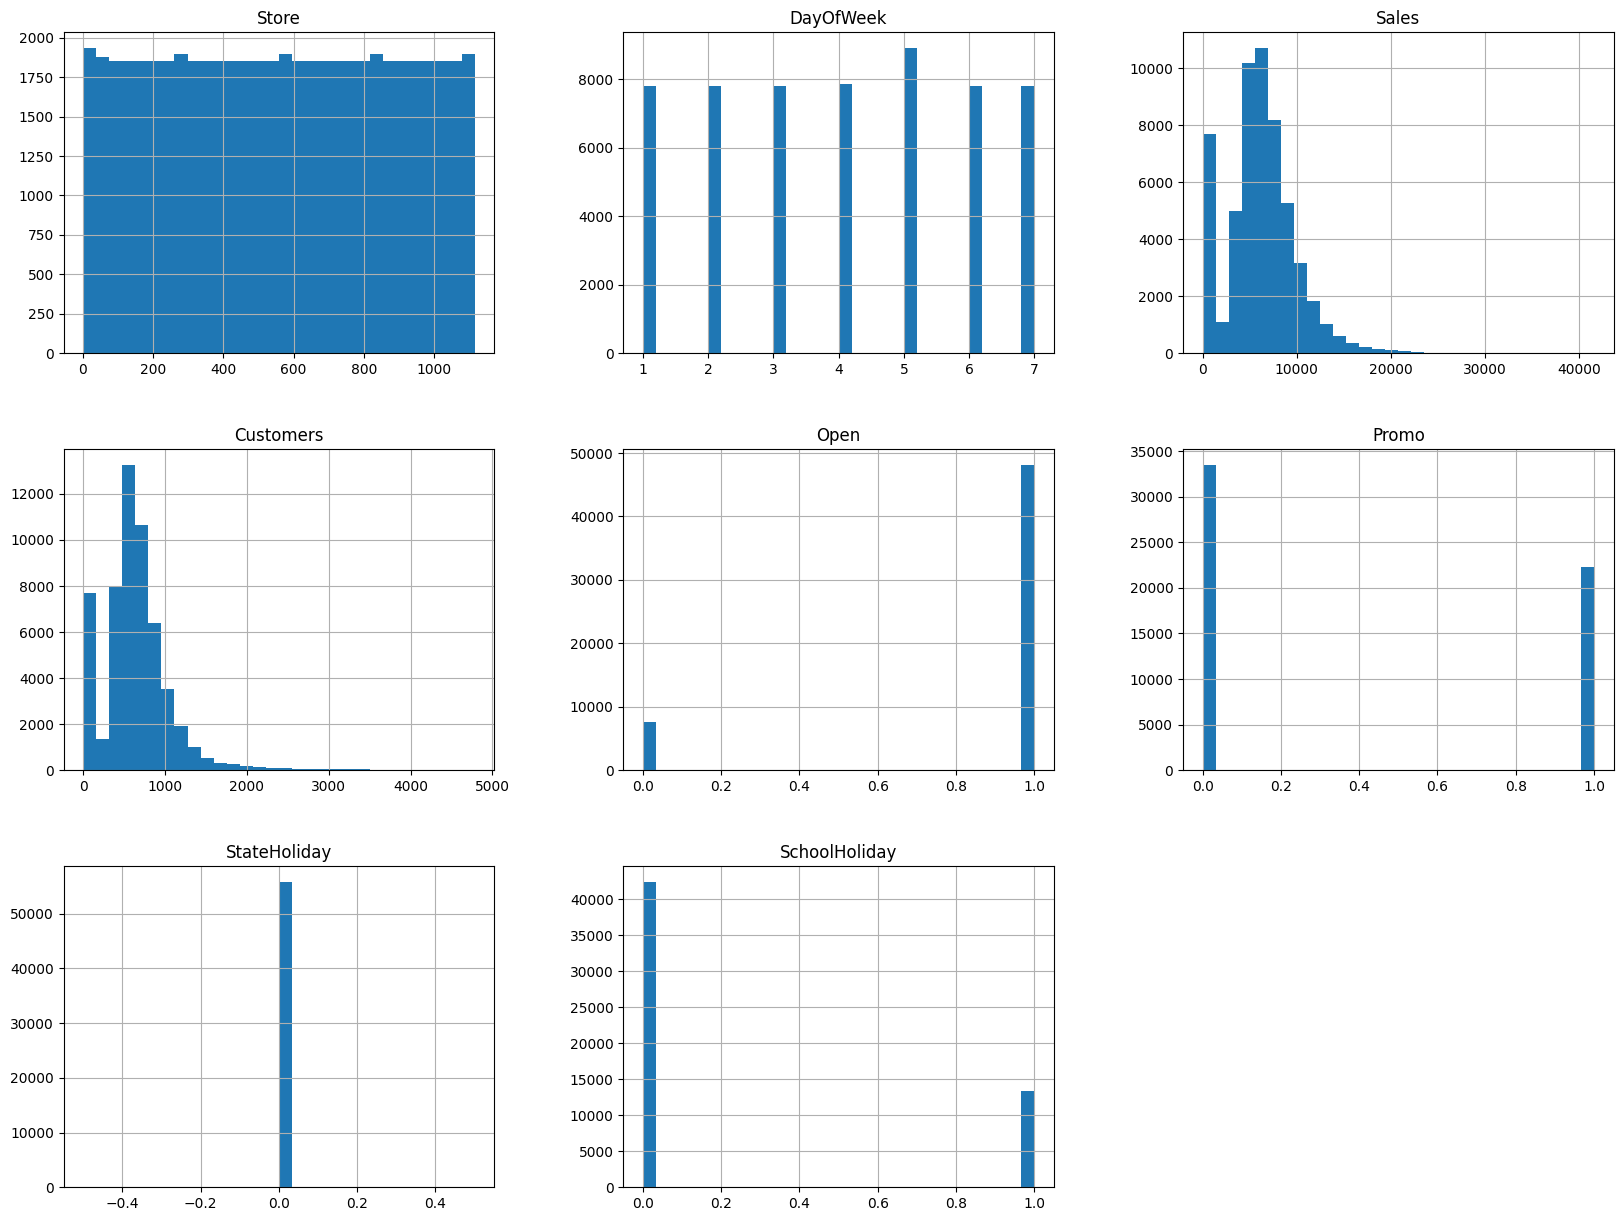

In [16]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time
sales_train_df.hist(bins=30, figsize=(20,15))
plt.show()


In [17]:
sales_train_df['Customers'].max()

4783

In [18]:
# Let's see how many stores are open and closed!
open_train_df = sales_train_df[sales_train_df["Open"]==1]
closed_train_df = sales_train_df[sales_train_df["Open"]==0]

print("Number of open stores: ", len(open_train_df["Store"].unique()))
print("Number of closed stores: ", len(closed_train_df["Store"].unique()))


Number of open stores:  1115
Number of closed stores:  1083


In [19]:
# Count the number of stores that are open and closed


In [20]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df["Open"]==1]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0


In [21]:
# Let's drop the open column since it has no meaning now
sales_train_df.drop(["Open"], axis= 1, inplace = True)
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0.0,1.0
1,2,5,2015-07-31,6064,625,1,0.0,1.0
2,3,5,2015-07-31,8314,821,1,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,0.0,1.0
4,5,5,2015-07-31,4822,559,1,0.0,1.0
...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,0,0.0,0.0
55809,60,4,2015-06-11,7289,678,0,0.0,0.0
55810,61,4,2015-06-11,3446,498,0,0.0,0.0
55811,62,4,2015-06-11,5975,708,0,0.0,0.0


In [22]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday
count,48175.000000,48175.000000,48175.000000,48175.000000,48175.000000,48174.0,48174.000000
mean,557.416523,3.551635,7085.018246,740.210088,0.462294,0.0,0.276166
std,322.102745,1.714314,3075.538878,387.500315,0.498581,0.0,0.447104
min,1.000000,1.000000,569.000000,75.000000,0.000000,0.0,0.000000
25%,278.000000,2.000000,5011.000000,512.000000,0.000000,0.0,0.000000
50%,557.000000,4.000000,6503.000000,656.000000,0.000000,0.0,0.000000
75%,836.000000,5.000000,8505.000000,857.000000,1.000000,0.0,1.000000
max,1115.000000,7.000000,41551.000000,4783.000000,1.000000,0.0,1.000000


In [23]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

TASK #3.2: EXPLORE STORES INFORMATION DATA

<Axes: >

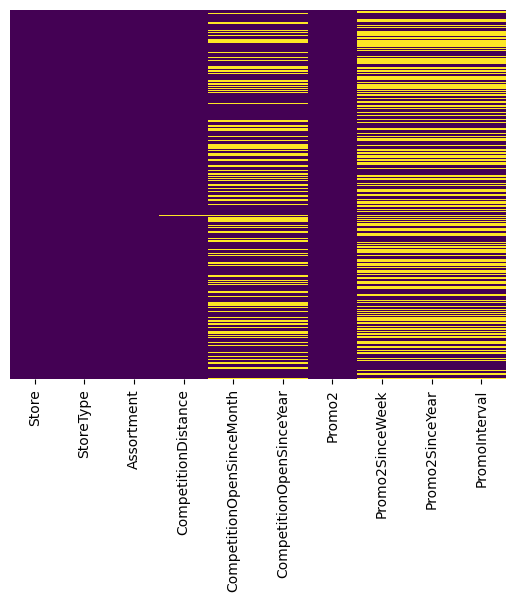

In [24]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [26]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [27]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_df[store_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [29]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

In [30]:
for str in str_cols:
  store_df[str].fillna(0, inplace = True)

<Axes: >

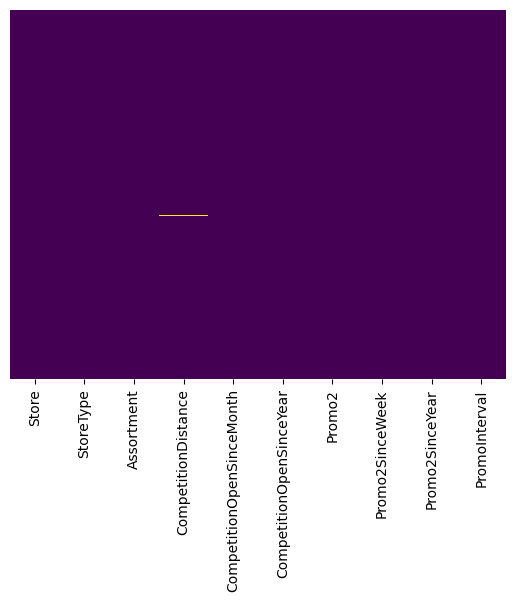

In [31]:
sns.heatmap(store_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

In [33]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

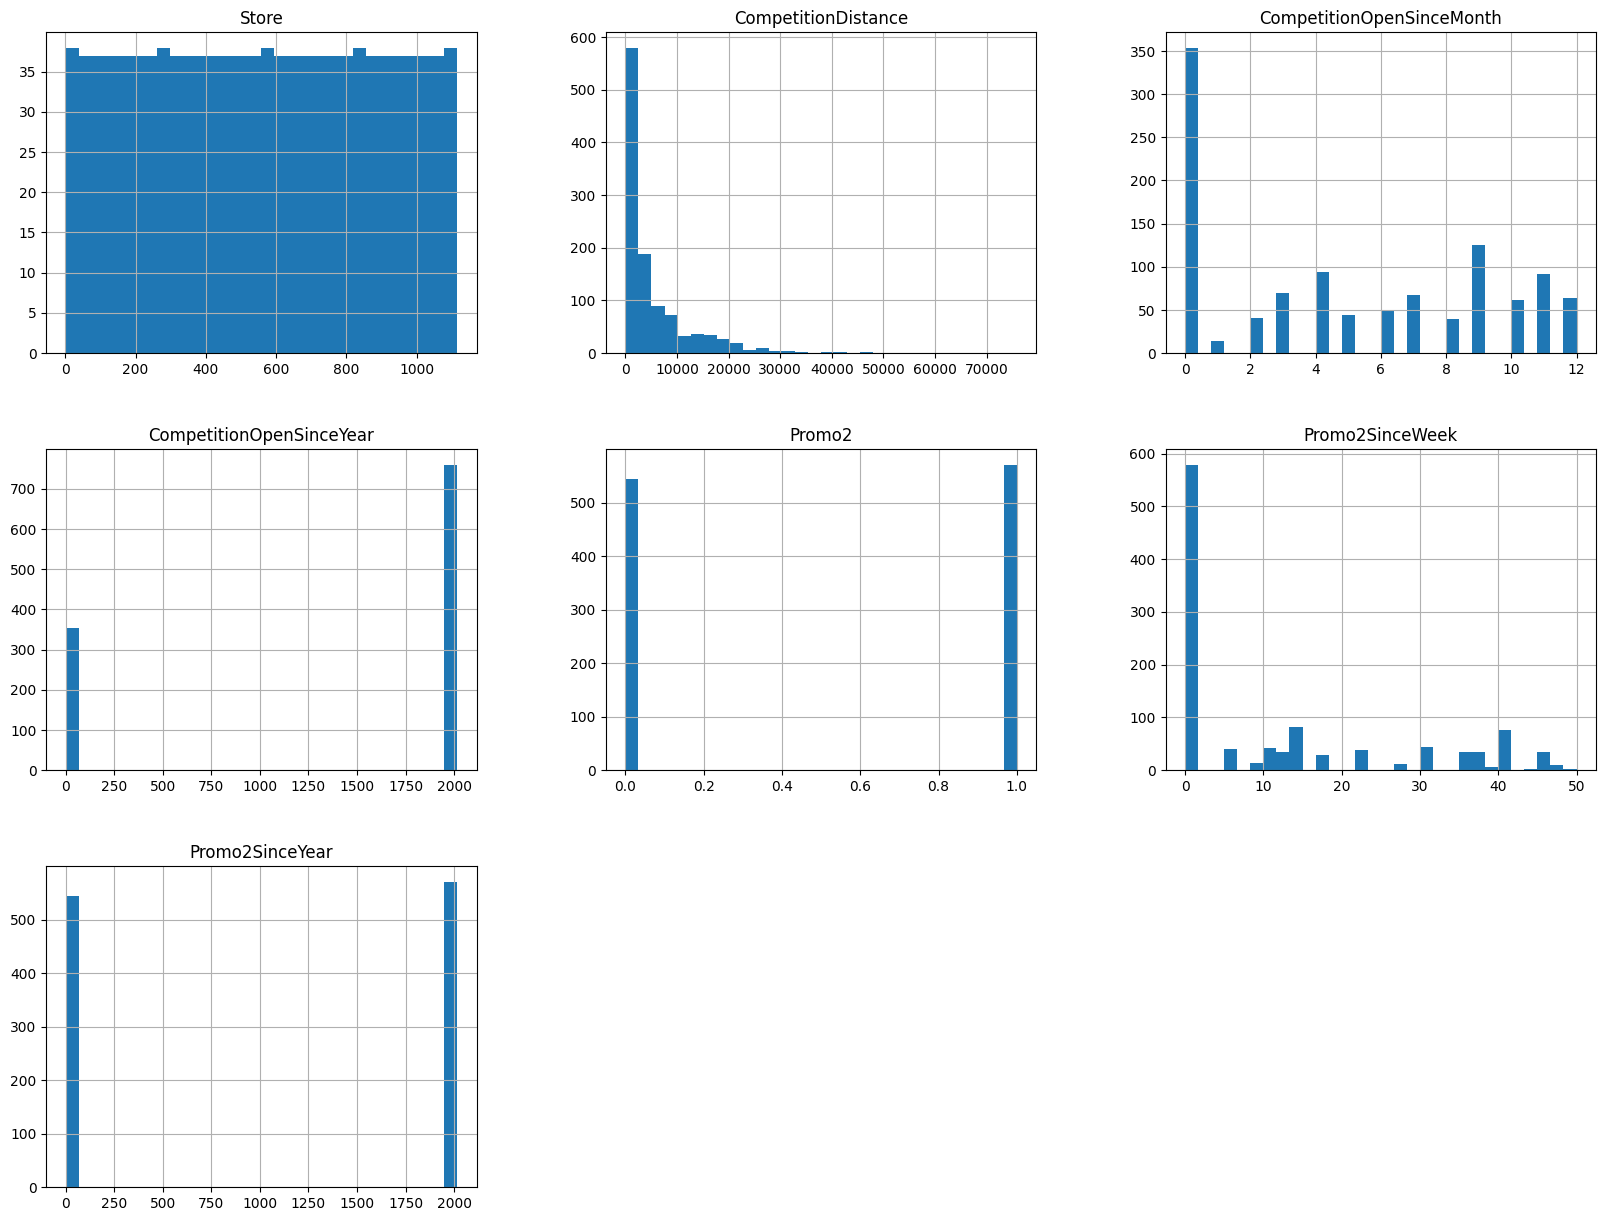

In [34]:
store_df.hist(bins=30, figsize=(20,15))
plt.show()

TASK #3.3: EXPLORE MERGED DATASET

In [35]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df, store_df, how = 'inner', on = 'Store')
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48170,292,3,2015-06-17,6491,794,1,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
48171,292,2,2015-06-16,7817,906,1,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
48172,292,1,2015-06-15,8984,1000,1,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
48173,292,6,2015-06-13,3739,427,0,0.0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [36]:
sales_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48175 entries, 0 to 48174
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      48175 non-null  int64  
 1   DayOfWeek                  48175 non-null  int64  
 2   Date                       48175 non-null  object 
 3   Sales                      48175 non-null  int64  
 4   Customers                  48175 non-null  int64  
 5   Promo                      48175 non-null  int64  
 6   StateHoliday               48174 non-null  float64
 7   SchoolHoliday              48174 non-null  float64
 8   StoreType                  48175 non-null  object 
 9   Assortment                 48175 non-null  object 
 10  CompetitionDistance        48175 non-null  float64
 11  CompetitionOpenSinceMonth  48175 non-null  float64
 12  CompetitionOpenSinceYear   48175 non-null  float64
 13  Promo2                     48175 non-null  int

In [37]:
sales_train_all_df.shape

(48175, 17)

In [38]:
sales_train_all_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,48175.000000,48175.000000,48175.000000,48175.000000,48175.000000,48174.0,48174.000000,48175.000000,48175.000000,48175.000000,48175.000000,48175.000000,48175.000000
mean,557.416523,3.551635,7085.018246,740.210088,0.462294,0.0,0.276166,5436.022257,4.933451,1370.987006,0.511116,12.047660,1028.245086
std,322.102745,1.714314,3075.538878,387.500315,0.498581,0.0,0.447104,7754.636167,4.283961,935.044683,0.499882,15.521383,1005.645397
min,1.000000,1.000000,569.000000,75.000000,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,278.000000,2.000000,5011.000000,512.000000,0.000000,0.0,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,557.000000,4.000000,6503.000000,656.000000,0.000000,0.0,0.000000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.000000,5.000000,8505.000000,857.000000,1.000000,0.0,1.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,4783.000000,1.000000,0.0,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [39]:
# Convert the 'Date' column to datetime objects
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])

# Extract numerical features from the 'Date' column if needed for correlation
sales_train_all_df['DayOfWeekNum'] = sales_train_all_df['Date'].dt.dayofweek
sales_train_all_df['Month'] = sales_train_all_df['Date'].dt.month

# Identify non-numeric columns (excluding the 'Date' column which is now datetime)
non_numeric_columns = sales_train_all_df.select_dtypes(exclude=['number', 'datetime']).columns

# Handle non-numeric columns - either drop them or convert them
# For this example, let's drop the non-numeric columns
sales_train_numeric_df = sales_train_all_df.drop(columns=non_numeric_columns)

# Now calculate correlations on the purely numerical DataFrame
correlations = sales_train_numeric_df.corr()['Sales'].sort_values()
print(correlations)

DayOfWeek                   -0.242545
DayOfWeekNum                -0.242545
Promo2SinceYear             -0.123956
Promo2                      -0.123946
Promo2SinceWeek             -0.051549
CompetitionOpenSinceMonth   -0.037120
Month                       -0.021766
CompetitionOpenSinceYear    -0.017524
CompetitionDistance         -0.000378
Store                        0.000430
Date                         0.021944
SchoolHoliday                0.104215
Promo                        0.413473
Customers                    0.791574
Sales                        1.000000
StateHoliday                      NaN
Name: Sales, dtype: float64


<Axes: >

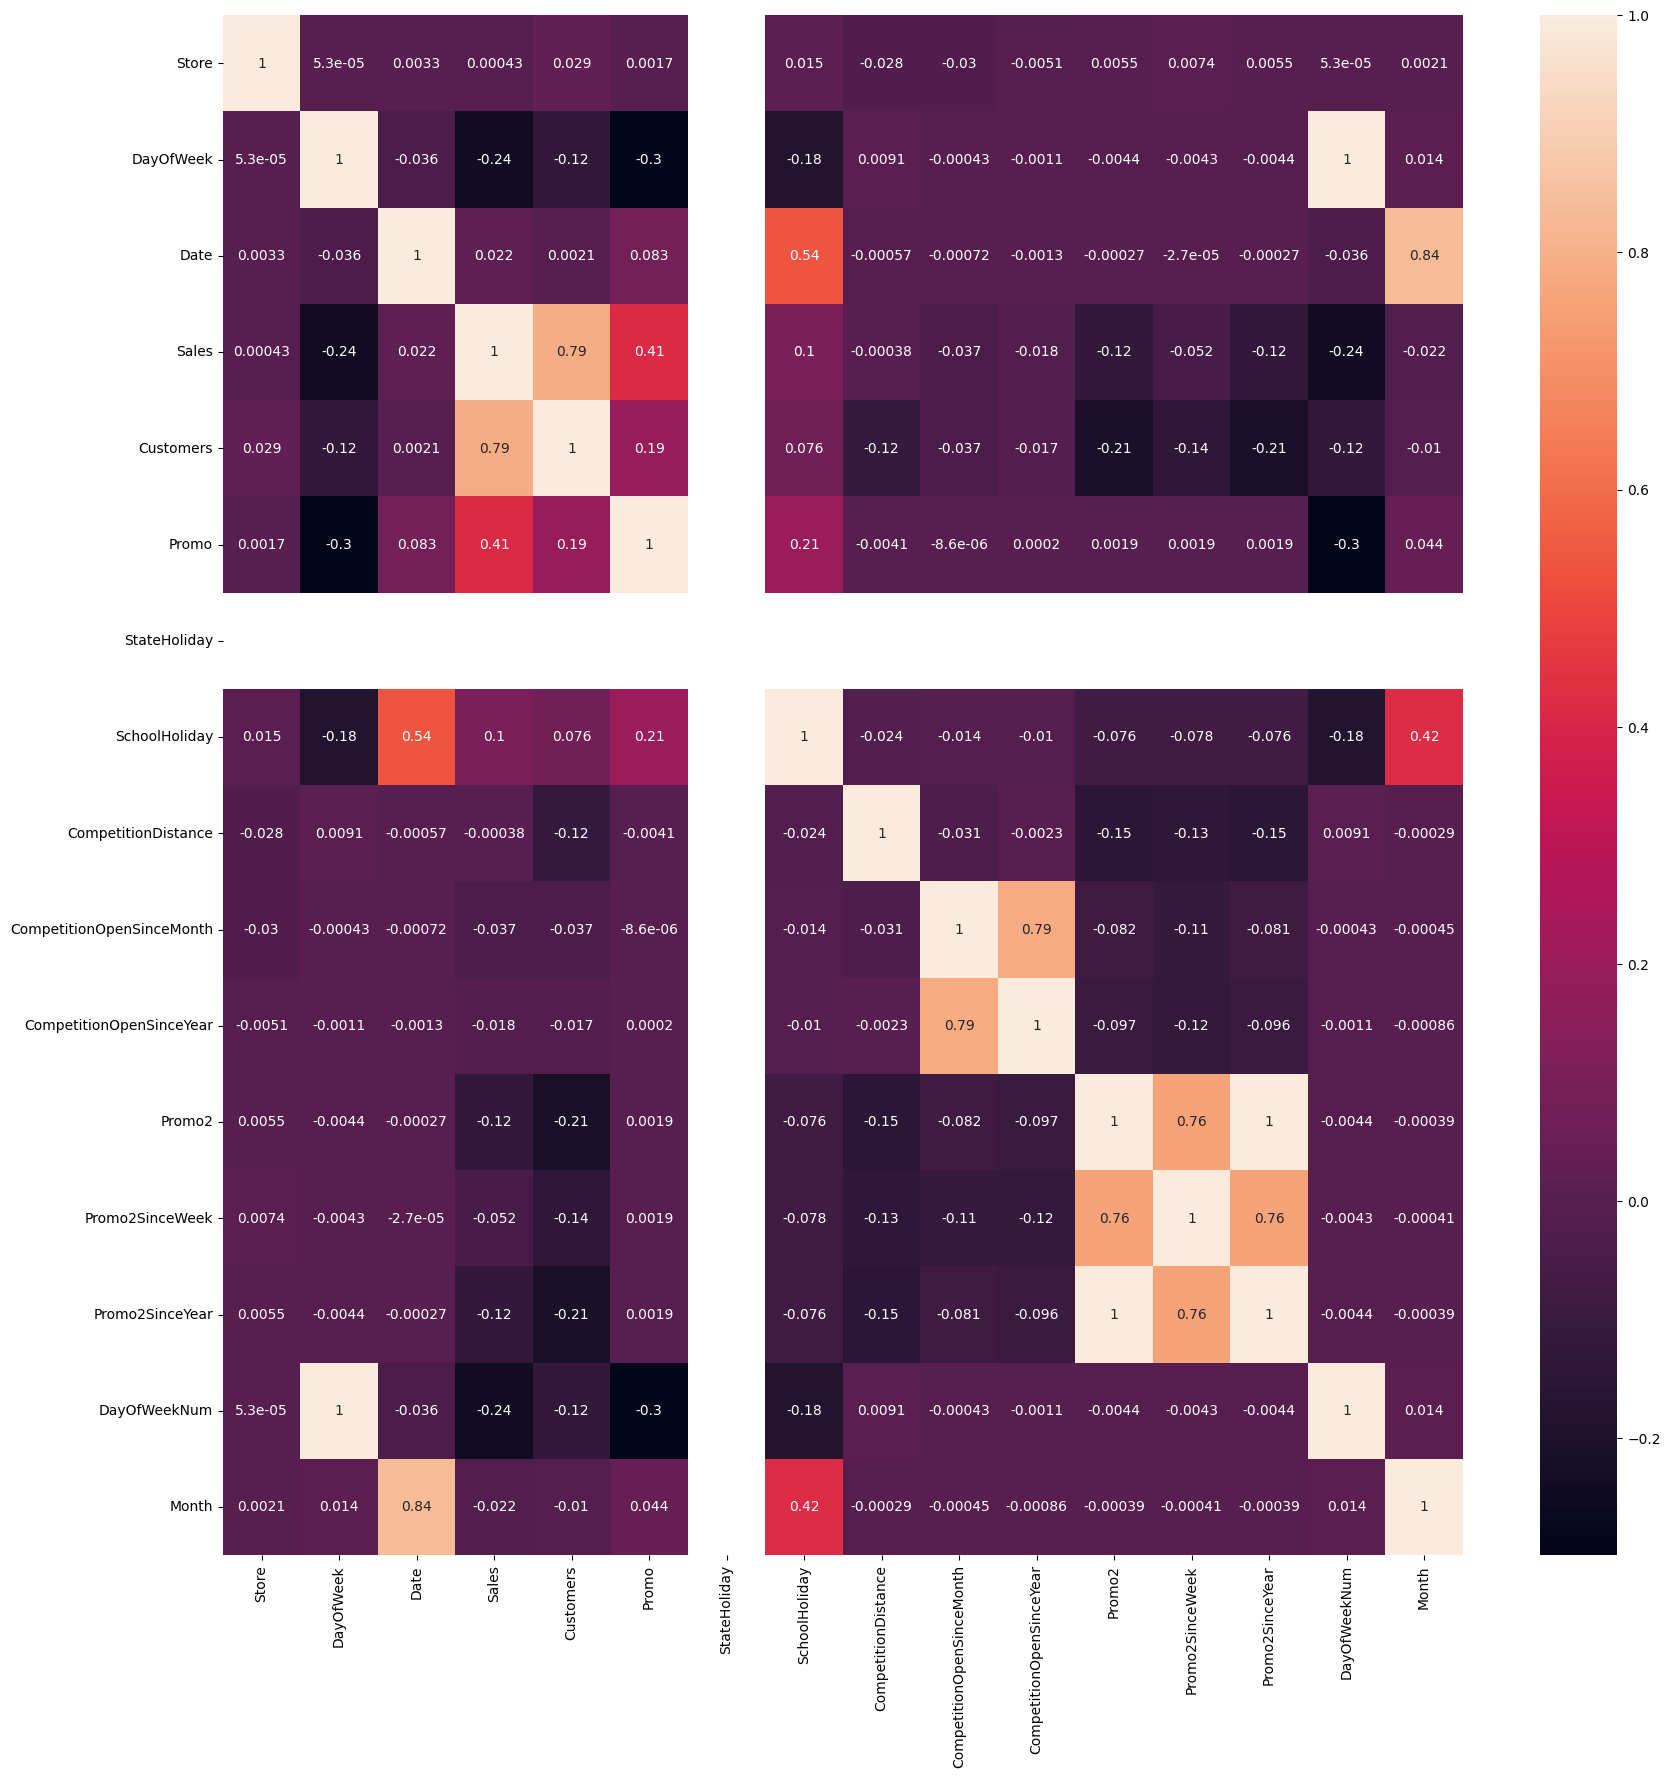

In [40]:
# Convert the 'Date' column to datetime objects
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])

# Extract numerical features from the 'Date' column if needed for correlation
sales_train_all_df['DayOfWeekNum'] = sales_train_all_df['Date'].dt.dayofweek
sales_train_all_df['Month'] = sales_train_all_df['Date'].dt.month

# Identify non-numeric columns (excluding the 'Date' column which is now datetime)
non_numeric_columns = sales_train_all_df.select_dtypes(exclude=['number', 'datetime']).columns

# Handle non-numeric columns - either drop them or convert them
# For this example, let's drop the non-numeric columns
sales_train_numeric_df = sales_train_all_df.drop(columns=non_numeric_columns)

# Now calculate correlations on the purely numerical DataFrame
correlations = sales_train_numeric_df.corr()

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

# Customers/Prmo2 and sales are strongly correlated

In [41]:
# Let's separate the year and put it into a separate column
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [42]:
sales_train_all_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekNum,Month,Year
0,1,5,2015-07-31,5263,555,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,7,2015
1,1,4,2015-07-30,5020,546,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,7,2015
2,1,3,2015-07-29,4782,523,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,7,2015
3,1,2,2015-07-28,5011,560,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,7,2015
4,1,1,2015-07-27,6102,612,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,7,2015


In [43]:
# Let's do the same for the Day and Month
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [44]:
sales_train_all_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekNum,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,0.0,1.0,c,a,...,9.0,2008.0,0,0.0,0.0,0,4,7,2015,31
1,1,4,2015-07-30,5020,546,1,0.0,1.0,c,a,...,9.0,2008.0,0,0.0,0.0,0,3,7,2015,30
2,1,3,2015-07-29,4782,523,1,0.0,1.0,c,a,...,9.0,2008.0,0,0.0,0.0,0,2,7,2015,29
3,1,2,2015-07-28,5011,560,1,0.0,1.0,c,a,...,9.0,2008.0,0,0.0,0.0,0,1,7,2015,28
4,1,1,2015-07-27,6102,612,1,0.0,1.0,c,a,...,9.0,2008.0,0,0.0,0.0,0,0,7,2015,27


Text(0.5, 1.0, 'Average Customers Per Month')

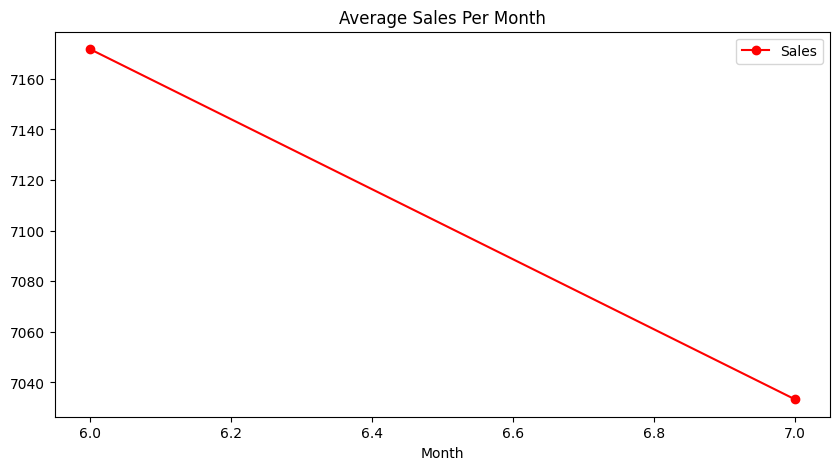

<Figure size 640x480 with 0 Axes>

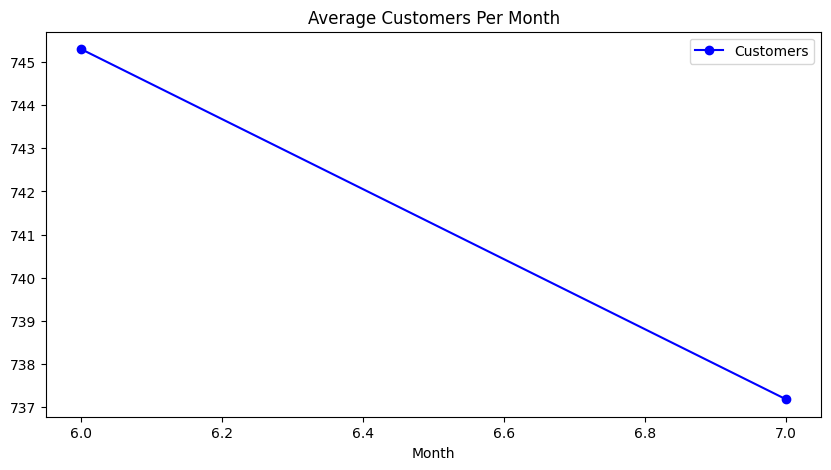

In [45]:
# Let's take a look at the average sales and number of customers per month
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column
# It looks like sales and number of customers peak around christmas timeframe

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()

axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

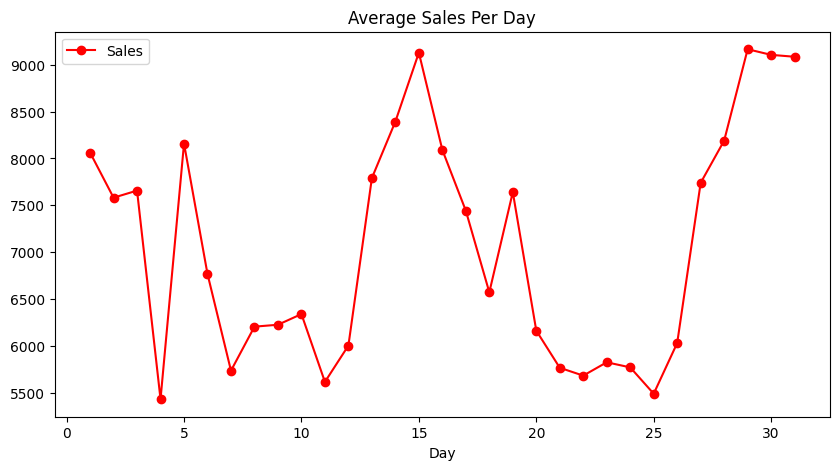

<Figure size 640x480 with 0 Axes>

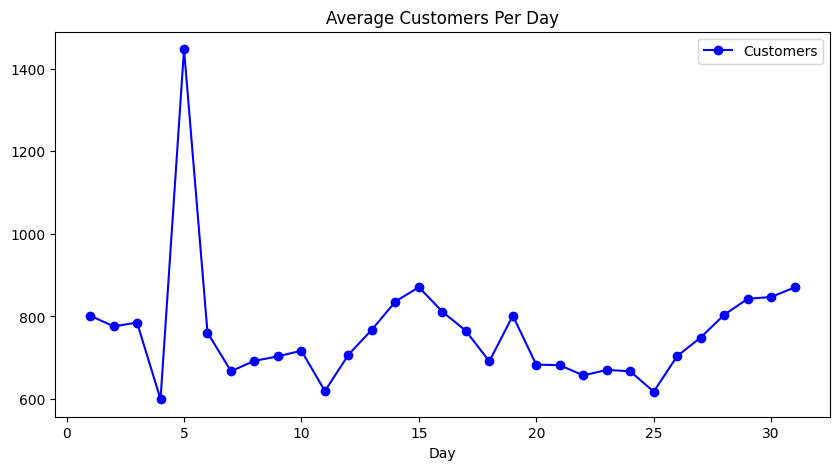

In [46]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month
# Most customers and sales are around 30th and 1st of the month

axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()

axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day')


Text(0.5, 1.0, 'Average Customers by Day of the Week')

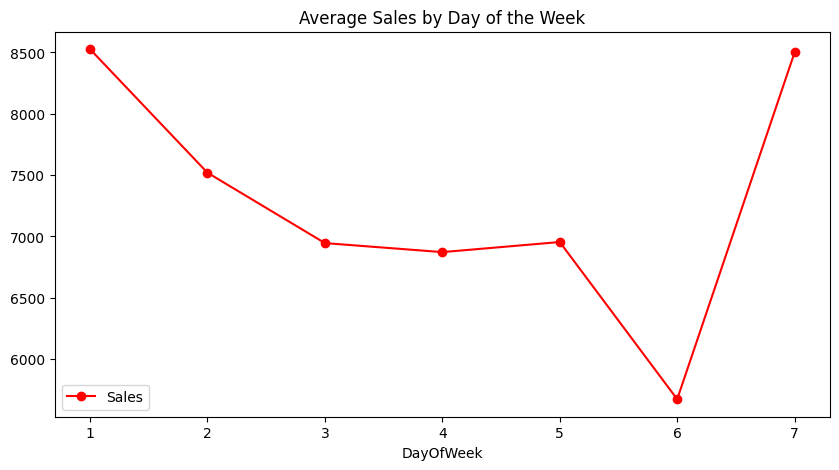

<Figure size 640x480 with 0 Axes>

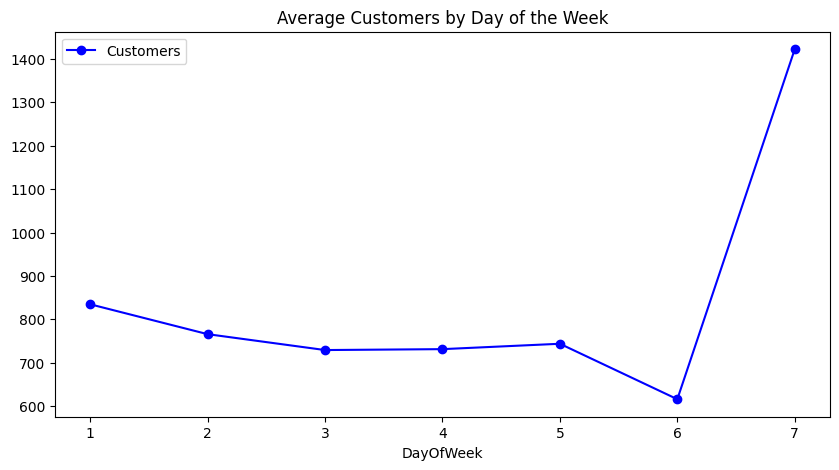

In [48]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Average Sales by Day of the Week")

plt.figure()

axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title("Average Customers by Day of the Week")

<Axes: xlabel='Promo', ylabel='Customers'>

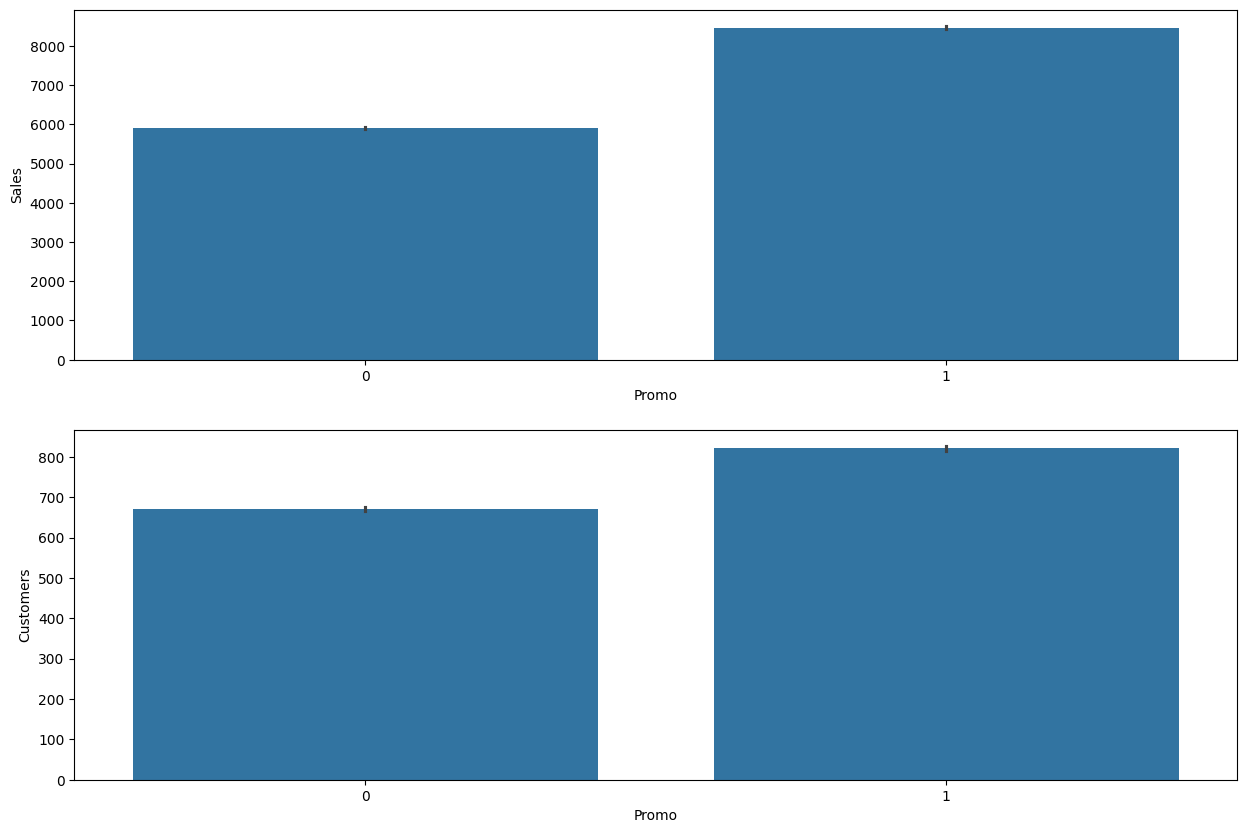

In [54]:
plt.figure(figsize = [15, 10])

plt.subplot(211)
sns.barplot(x = 'Promo', y ='Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x = 'Promo', y ='Customers', data = sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

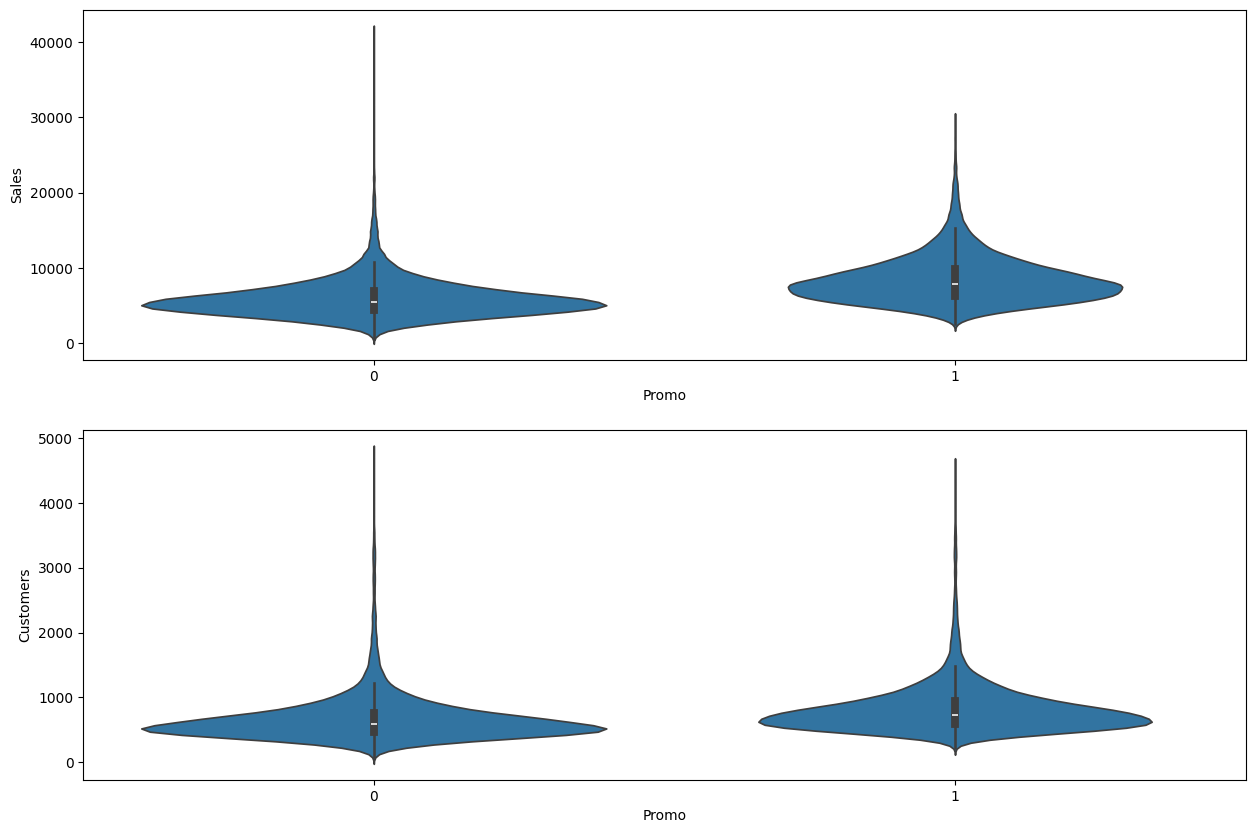

In [55]:
plt.figure(figsize = [15, 10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y ='Sales', data = sales_train_all_df)
plt.subplot(212)
sns.violinplot(x = 'Promo', y ='Customers', data = sales_train_all_df)

# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [60]:
# import prophet

!pip install prophet



In [61]:
from prophet import Prophet

In [66]:
def sales_predictions(Store_ID, sales_df, periods):
  sales_df= sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']]
  sales_df = sales_df.rename(columns={'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel = 'Sales')
  figure2 = model.plot_components(forecast)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c_24o85/ney0ay0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c_24o85/hvibxlum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84725', 'data', 'file=/tmp/tmp0c_24o85/ney0ay0o.json', 'init=/tmp/tmp0c_24o85/hvibxlum.json', 'output', 'file=/tmp/tmp0c_24o85/prophet_modelgr2ckvvq/prophet_model-20240712155823.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


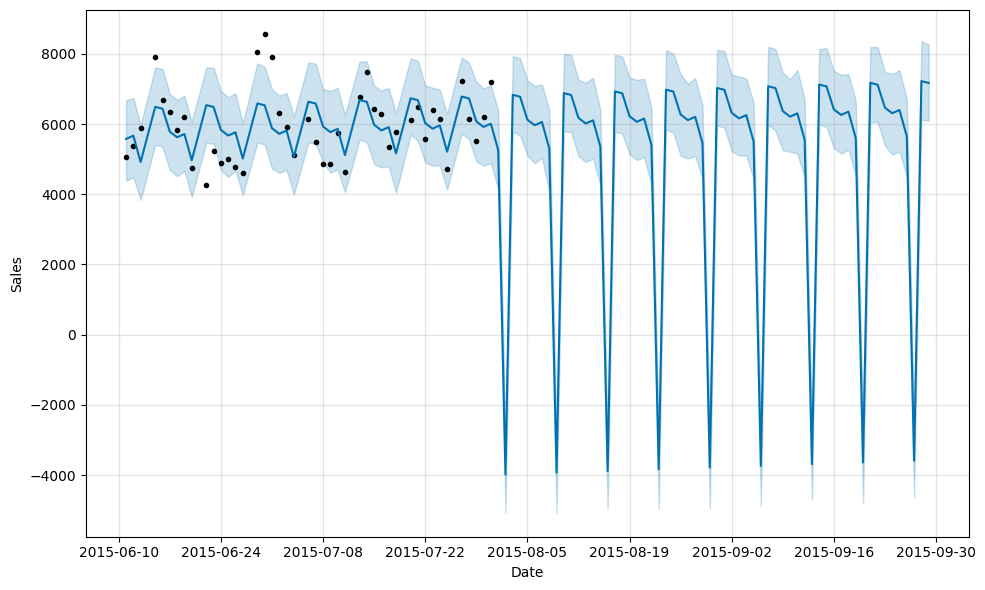

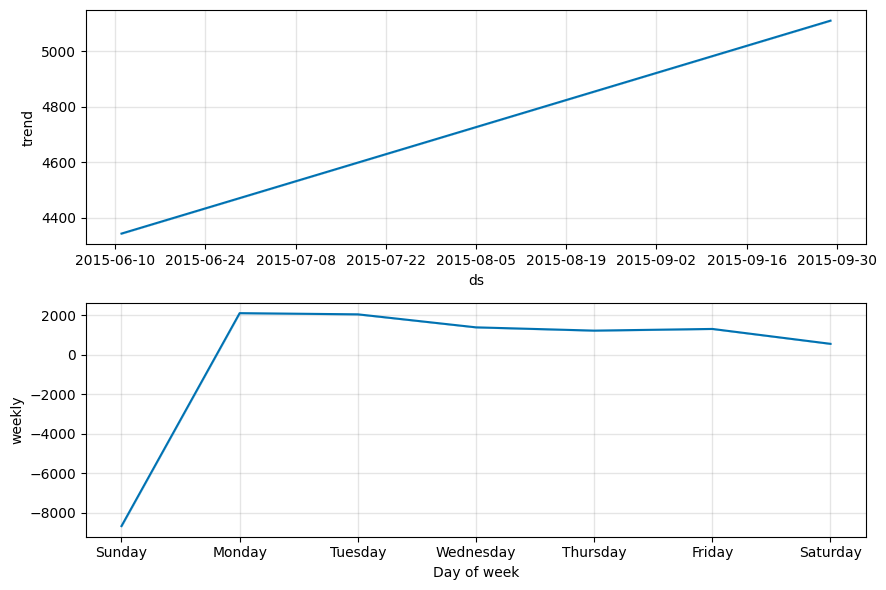

In [67]:
df = sales_predictions(10, sales_train_all_df, 60)
df

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [89]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

In [90]:
# Get all the dates pertaining to school holidays
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(13304,)

In [91]:
school_holidays

array(['2015-07-31T00:00:00.000000000', '2015-07-30T00:00:00.000000000',
       '2015-07-29T00:00:00.000000000', ...,
       '2015-07-15T00:00:00.000000000', '2015-07-14T00:00:00.000000000',
       '2015-07-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [93]:
# Get all the dates pertaining to state holidays
state_holidays = sales_train_all_df [ (sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(0,)

In [94]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [95]:
state_holidays

,ds,holiday


In [96]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [97]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
13299,2015-07-28,school_holiday
13300,2015-07-27,school_holiday
13301,2015-07-15,school_holiday
13302,2015-07-14,school_holiday


In [98]:
# concatenate both school and state holidays
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [99]:
school_state_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
13299,2015-07-28,school_holiday
13300,2015-07-27,school_holiday
13301,2015-07-15,school_holiday
13302,2015-07-14,school_holiday


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c_24o85/6miwt9zp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0c_24o85/1qhh6eq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66700', 'data', 'file=/tmp/tmp0c_24o85/6miwt9zp.json', 'init=/tmp/tmp0c_24o85/1qhh6eq9.json', 'output', 'file=/tmp/tmp0c_24o85/prophet_model1nv66p_q/prophet_model-20240712161856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


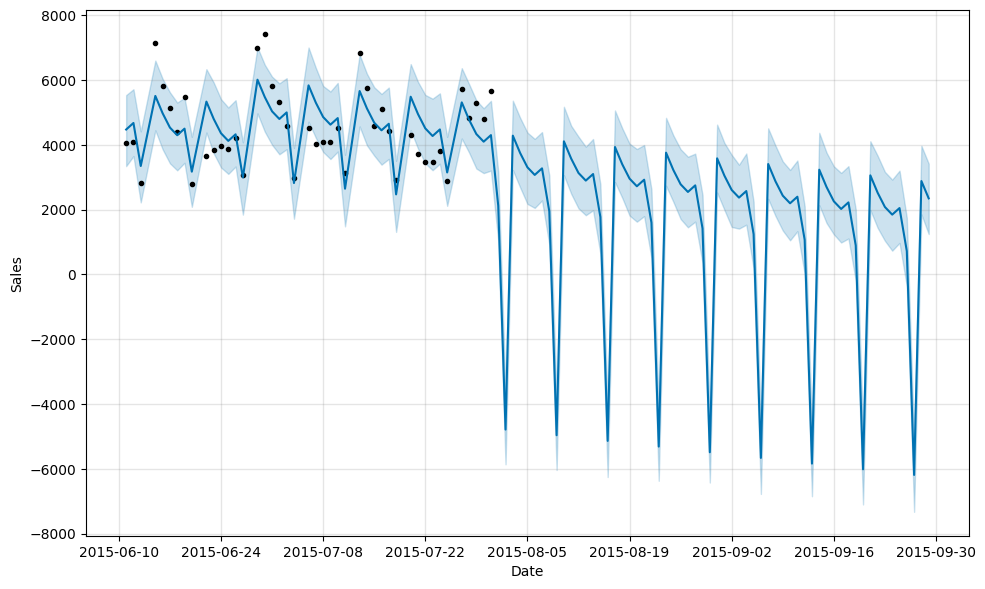

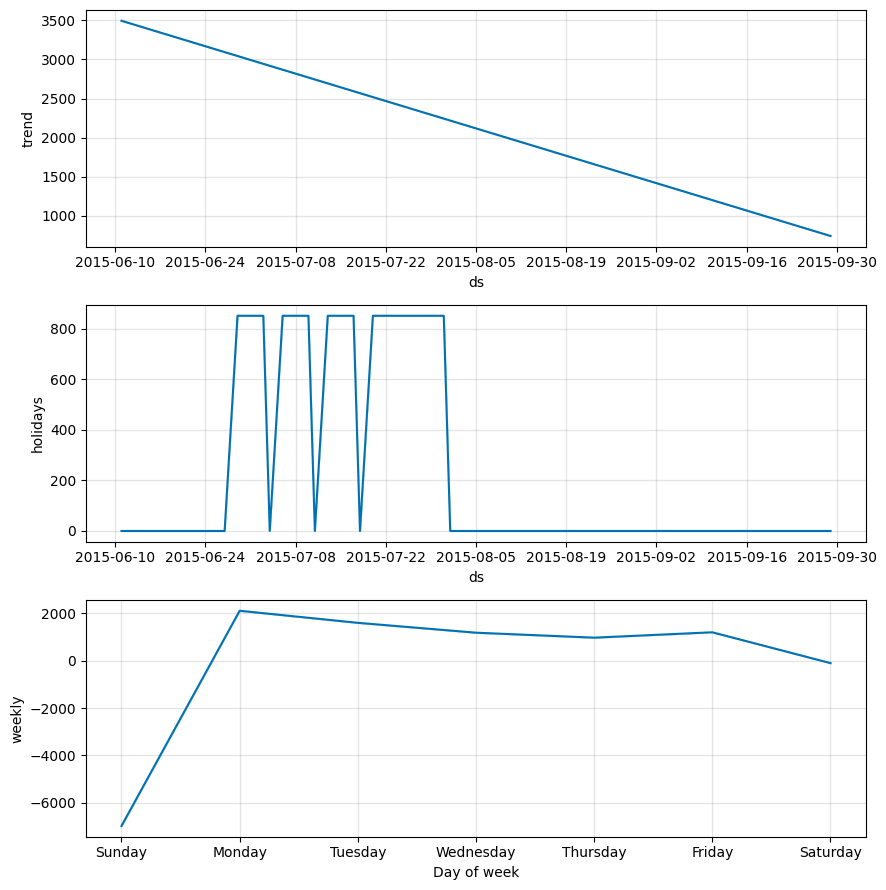

In [100]:
# Let's make predictions using holidays for a specific store
sales_prediction(6, sales_train_all_df, school_state_holidays, 60)